## Funds included in analysis

- Axis Gilt
- Edelweiss Govt Secs
- ABSL Govt Secs
- DSP Govt Decs
- HDFC Gilt
- ICICI Pru Gilt
- Nippon Gilt
- SBI Magnum Gilt

In [1]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [111]:
sns.set()
plt.rcParams['figure.figsize'] = (15, 10)

In [148]:
gilt_funds_csv_files = ['ABSLGovtSecsDirectGrowth.csv',
 'AxisGiltDirectGrowth.csv',
 'DSPGovtSecsDirectGrowth.csv',
 'EdelweissGovtSecsDirectGrowth.csv',
 'HDFCGiltDirectGrowth.csv',
 'ICICIGiltDirectGrowth.csv',
 'NipponGiltDirectGrowth.csv',
 'SBIGiltDirectGrowth.csv']

gilt_fund_names = ['absl_gilt', 'axis_gilt', 'dsp_gilt', 'edelweiss_gilt', 'hdfc_gilt', 'icici_gilt', 'nippon_gilt', 'sbi_gilt']

gilt_fund_dfs = {}

def read_fund_info(file_name, fund_name, start_date, end_date):
    df = pd.read_csv(file_name, skiprows=4)
    df = df[['NAV date', 'Net Asset Value']]
    df['NAV date'] = pd.to_datetime(df['NAV date'], infer_datetime_format=True)
    df.columns = ['date', f'{fund_name}_NAV']
    df = df[(df['date'] >= start_date) & (df['date'] <= end_date)]
    df = df.dropna()
    return df

def calculate_rolling_returns(df, fund_name, num_years, num_trading_days):
    for num_year in num_years:
        df[f'{fund_name}_{num_year}Y_rolling_ret'] = df[f'{fund_name}_NAV'].pct_change(periods=num_trading_days * num_year)
        df[f'{fund_name}_{num_year}Y_rolling_ret'] = ((df[f'{fund_name}_{num_year}Y_rolling_ret'] + 1) ** (1/num_year)) - 1
    
    return df

In [149]:
gilt_funds_1Y_ret_mean = []
gilt_funds_1Y_ret_std = []
gilt_funds_3Y_ret_mean = []
gilt_funds_3Y_ret_std = []
gilt_funds_5Y_ret_mean = []
gilt_funds_5Y_ret_std = []

for file_name, fund_name in zip(gilt_funds_csv_files, gilt_fund_names):
    start_date = pd.Timestamp('2013-01-01')
    end_date = pd.Timestamp('2021-12-31')
    gilt_fund_df = read_fund_info(f'data/Debt_Gilt/{file_name}', fund_name, start_date, end_date)
    num_years = [1,3,5]
    num_trading_days = 250
    gilt_fund_df = gilt_fund_df.pipe(calculate_rolling_returns, fund_name, num_years, num_trading_days)
    gilt_fund_df.replace([np.inf, -np.inf], np.nan, inplace=True)
    
    gilt_fund_1Y_ret_mean = gilt_fund_df[f'{fund_name}_1Y_rolling_ret'].mean()
    gilt_fund_3Y_ret_mean = gilt_fund_df[f'{fund_name}_3Y_rolling_ret'].mean()
    gilt_fund_5Y_ret_mean = gilt_fund_df[f'{fund_name}_5Y_rolling_ret'].mean()
    gilt_fund_1Y_ret_std = gilt_fund_df[f'{fund_name}_1Y_rolling_ret'].std()
    gilt_fund_3Y_ret_std = gilt_fund_df[f'{fund_name}_3Y_rolling_ret'].std()
    gilt_fund_5Y_ret_std = gilt_fund_df[f'{fund_name}_5Y_rolling_ret'].std()
    gilt_funds_1Y_ret_mean.append(gilt_fund_1Y_ret_mean)
    gilt_funds_3Y_ret_mean.append(gilt_fund_3Y_ret_mean)
    gilt_funds_5Y_ret_mean.append(gilt_fund_5Y_ret_mean)
    gilt_funds_1Y_ret_std.append(gilt_fund_1Y_ret_std)
    gilt_funds_3Y_ret_std.append(gilt_fund_3Y_ret_std)
    gilt_funds_5Y_ret_std.append(gilt_fund_5Y_ret_std)
    
    gilt_fund_dfs[fund_name] = gilt_fund_df

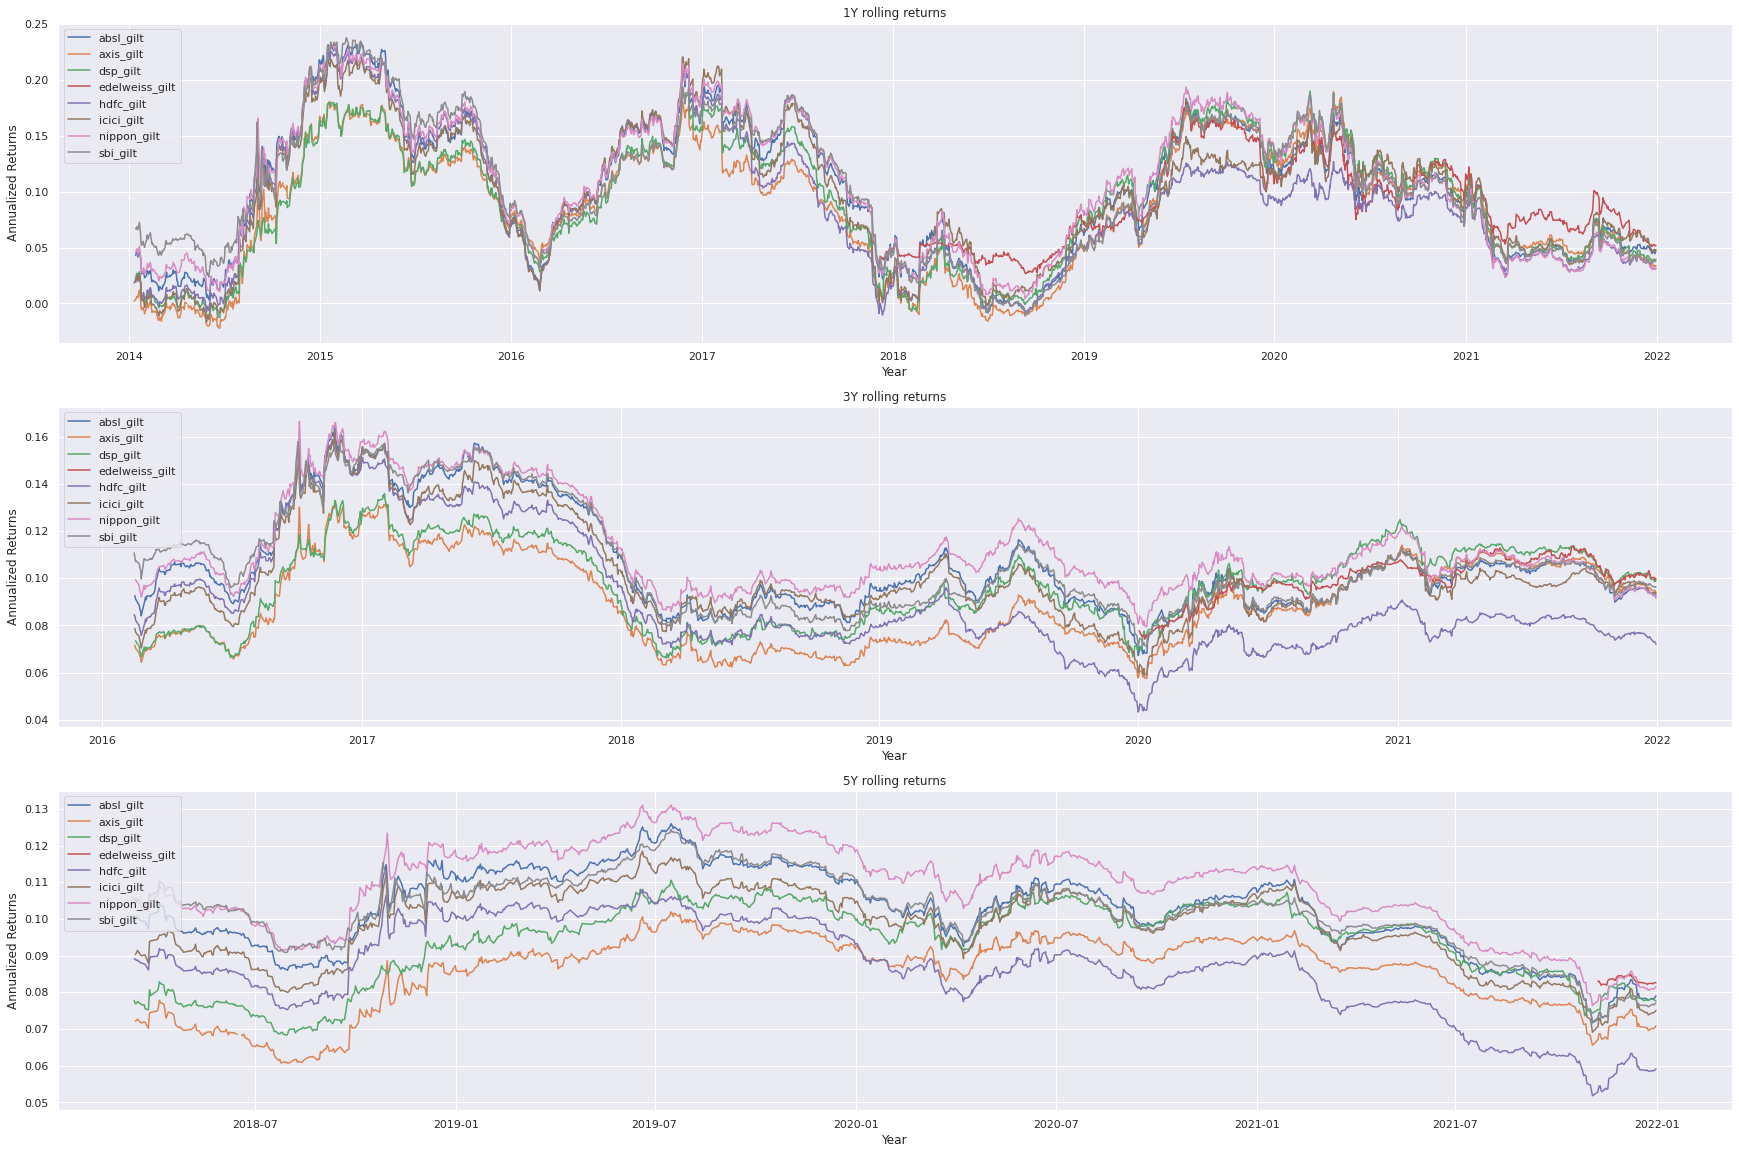

In [127]:
num_years = [1,3,5]
fig, ax = plt.subplots(nrows=3, ncols=1, figsize=(30, 20))

for i , num_year in enumerate(num_years): 
    for fund_name in gilt_fund_names:
        ax[i].plot(gilt_fund_dfs[fund_name]['date'], gilt_fund_dfs[fund_name][f'{fund_name}_{num_year}Y_rolling_ret'])
        ax[i].set_title(f'{num_year}Y rolling returns')
        ax[i].set_xlabel('Year')
        ax[i].set_ylabel('Annualized Returns')
        ax[i].legend(gilt_fund_names, loc='upper left')
plt.savefig('plots/GiltFundsComparison.png', dpi=300)

In [172]:
gilt_funds_comparison = pd.DataFrame(data={
    'fund_name': gilt_fund_names,
    '1Y_ret_mean': gilt_funds_1Y_ret_mean,
    '3Y_ret_mean': gilt_funds_3Y_ret_mean,
    '5Y_ret_mean': gilt_funds_5Y_ret_mean,
    '1Y_ret_std': gilt_funds_1Y_ret_std,
    '3Y_ret_std': gilt_funds_3Y_ret_std,
    '5Y_ret_std': gilt_funds_5Y_ret_std
})

gilt_funds_comparison.set_index('fund_name', inplace=True)
gilt_funds_comparison.drop(['edelweiss_gilt'], inplace=True)

In [173]:
gilt_funds_comparison.head(10)

,1Y_ret_mean,3Y_ret_mean,5Y_ret_mean,1Y_ret_std,3Y_ret_std,5Y_ret_std
fund_name,,,,,,
absl_gilt,0.103611,0.105883,0.102560,0.059512,0.021167,0.011197
axis_gilt,0.087905,0.089968,0.085857,0.055139,0.018370,0.010265
dsp_gilt,0.093890,0.097549,0.094042,0.055300,0.017001,0.010843
hdfc_gilt,0.088932,0.090180,0.086524,0.057849,0.025150,0.012777
icici_gilt,0.099323,0.101724,0.098693,0.057624,0.020937,0.010538
nippon_gilt,0.108331,0.112312,0.109280,0.059483,0.019553,0.011982
sbi_gilt,0.105248,0.105990,0.102567,0.059191,0.021649,0.010211


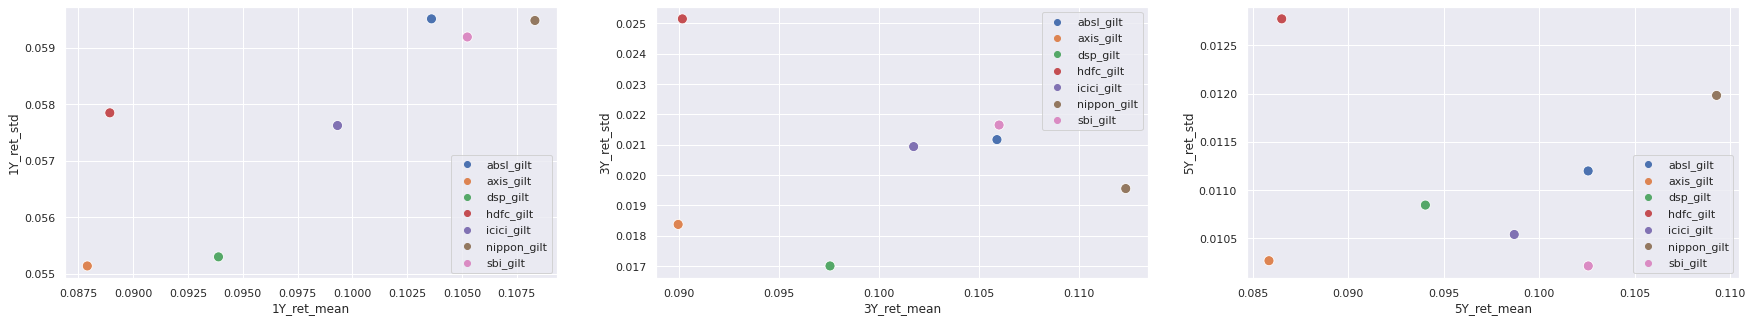

In [187]:
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(30, 5))

sns.scatterplot(data=gilt_funds_comparison, x='1Y_ret_mean', y='1Y_ret_std', hue='fund_name', ax=ax[0], s=100)
ax[0].legend(loc='best')
sns.scatterplot(data=gilt_funds_comparison, x='3Y_ret_mean', y='3Y_ret_std', hue='fund_name', ax=ax[1], s=100)
ax[1].legend(loc='best')
sns.scatterplot(data=gilt_funds_comparison, x='5Y_ret_mean', y='5Y_ret_std', hue='fund_name', ax=ax[2], s=100)
ax[2].legend(loc='best')

plt.show()